# Religious Text Identification

By: Jonathan Barfuss

## Abstract

In this project we will be discovering the ability of machine learning to measure similarity between books. We will specifically be looking at a comparison between two books of Christian scripture, the Book of Mormon and the Bible, with some 18th and 19th century books as well to act as our control group. All of these books will be used to make a Multinomial Naive Bayes classification model to classify each of these books. Our focus will be on the misclassification rate of these books to identify similarity between books. A scatterplot of the books will also be made using TSNE. This will be a potentially useful tool to visualize the similarity between books by finding their proximity and overlap of eachother.

The results of this project will not prove a similarity between the Book of Mormon and the Bible or their messages. The results will simply find a level of overlap between the two and find machine learning's ability to distinguish them from eachother. The interpretation of those results are left to the reader.

The primary objective of this project is to discover if machine learning can be used to measure similarity between books. While similarity doesn't have a universal or measurable definition, this project intends to show that a machine learning algorithm can distinguish a book from set A better than it can set B. Hopefully, this work can be built upon further for measuring similarity between many types of objects a computer can measure.

## Introduction

The purpose of this project is to measure similarity between different Christian religious texts and see if machine learning methods are effective for measuring this. The motivation for this project comes from an interest in the Book of Mormon, a Christian book of scripture that was published in 1830. Its publishers indicate that it shares the same messages and truths that are in the King James Bible, but there is disagreement among Christians if this is the case, with many agreeing and many not.

The intent behind this project is not to answer the question of whether the Book of Mormon and the Bible share the same message. This project seeks to discover if machine learning can be a tool for measuring the similarity between these books. If machine learning can measure the similarity between books, while it wouldn't prove or disprove similarity, it can be a tool individuals use to determine the authenticity of the Book of Mormon's message compared to the Bible.

## Approach

To measure the similarity of the Book of Mormon to the Bible we will measure the misclassification rate from one book to the other and use other 18th and 19th century books as comparison. We will also attempt to represent each verse from the books as 2 different dimensions and plot them to check for obvious clusters.

First let's look at the data we will be using:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

book_of_mormon = pd.read_csv('data/BookOfMormon.csv')
new_testament = pd.read_csv('data/NewTestament_KJV.csv')
old_testament = pd.read_csv('data/OldTestament_KJV.csv')

book_of_mormon['y'] = 'Book of Mormon'
new_testament['y'] = 'New Testament'
old_testament['y'] = 'Old Testament'

The Bible is divided into the New Testament and Old Testament, so they will be treated as separate books. Here are some sample verses and the features we will be working with:

In [2]:
book_of_mormon.sample(5)

,Book Name,Chapter Number,Verse Number,Word Count,Text,y
6517,Moroni,7,13.0,36,"But behold, that which is of God inviteth and ...",Book of Mormon
1663,Omni,1,12.0,68,"Behold, I am Amaleki, the son of Abinadom. Beh...",Book of Mormon
1665,Omni,1,14.0,49,"And they discovered a people, who were called ...",Book of Mormon
5507,3 Nephi,19,14.0,41,"And behold, they were encircled about as if it...",Book of Mormon
2939,Alma,14,19.0,47,And it came to pass that the judge stood befor...,Book of Mormon


In [3]:
new_testament.sample(5)

,Book Name,Chapter Number,Verse Number,Word Count,Text,y
6732,2 Timothy,2,24.0,19,And the servant of the Lord must not strive; b...,New Testament
1881,Luke,2,50.0,11,And they understood not the saying which he sp...,New Testament
4733,Acts,27,18.0,15,And we being exceedingly tossed with a tempest...,New Testament
5005,Romans,8,28.0,25,And we know that all things work together for ...,New Testament
2361,Luke,12,44.0,18,"Of a truth I say unto you, that he will make h...",New Testament


In [4]:
old_testament.sample(5)

,Book Name,Chapter Number,Verse Number,Word Count,Text,y
21487,Ezekiel,34,26.0,32,And I will make them and the places round abou...,Old Testament
8701,2 Samuel,23,36.0,10,"Igal the son of Nathan of Zobah, Bani the Gadite,",Old Testament
14960,Psalm,66,3.0,23,"Say unto God, How terrible art thou in thy wor...",Old Testament
19832,Jeremiah,30,19.0,37,And out of them shall proceed thanksgiving and...,Old Testament
17815,Isaiah,1,16.0,20,"Wash you, make you clean; put away the evil of...",Old Testament


Our focus will be with the Text column.
Let's combine the books into one dataset. Note, the Old Testament has many more verses then the other 2 books so we will only use a random sample of verses from it.

In [5]:
frames = [book_of_mormon, new_testament, old_testament.sample(frac = 0.25)]
data = pd.concat(frames)

To use as a control for comparison, let's also introduce 3 different books to compare the religious texts to. We will be using "The Castle of Otranto" (1764), "Frankenstein" (1817), and "Jane Eyre" (1847) because these were published around the same time the Book of Mormon was.

In [6]:
castle_of_otranto = pd.read_fwf('data/castleofotranto.txt', header=None)
castle_of_otranto['y'] = 'Castle of Otranto'

frankenstein = pd.read_fwf('data/frankenstein.txt', header=None)
frankenstein['y'] = 'Frankenstein'

jane_eyre = pd.read_fwf('data/janeeyre.txt', header=None)
jane_eyre['y'] = 'Jane Eyre'

frames = [castle_of_otranto, frankenstein, jane_eyre.sample(frac = 0.33)]
bookData = pd.concat(frames)
bookData = bookData.rename(columns={0: "Text", "y": "y"})

In [7]:
frames = [data, bookData]
allData = pd.concat(frames)

Now let's make training and testing sets for the data:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(allData['Text'], allData['y'], test_size=0.2)

We will be using Multinomial Naive Bayes classifier for predicting our text and TfidfVectorizer to turn the text into vectors for the classifier.

First we need to find out ideal hyperparamets for Naive Bayes, so let's divide the training data into training and validation, then try to find the ideal alpha for our classifier.

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Best alpha: 0.1


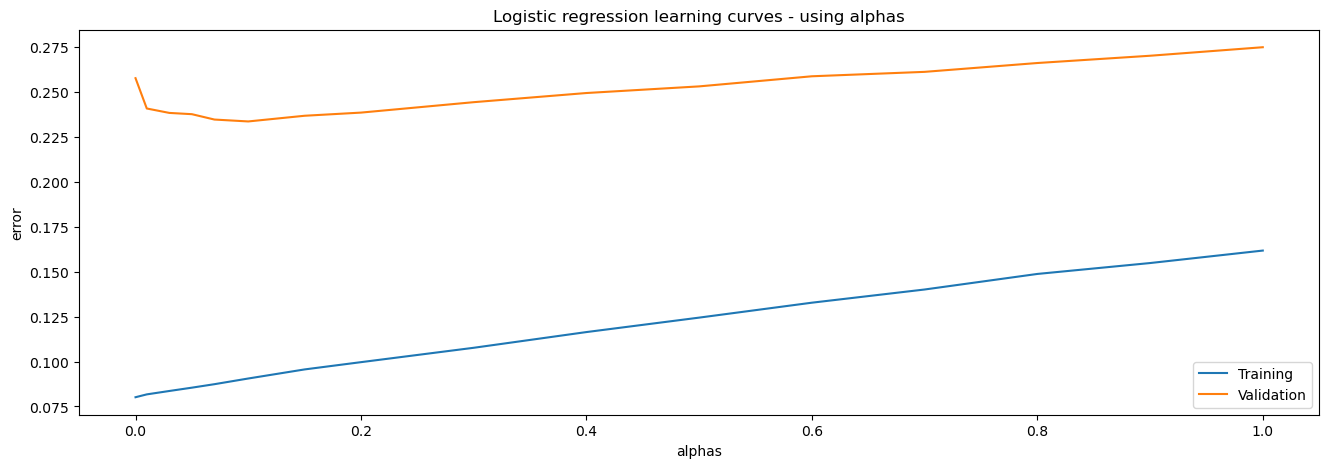

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

vectorizer = TfidfVectorizer(stop_words='english')

X_train2, X_valid, y_train2, y_valid = train_test_split(X_train, y_train, test_size=0.2)
tfid_vect_results_train = vectorizer.fit_transform(X_train2)

alphas = [0, 0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
train_err = []
valid_err = []
for a in alphas:
    clf = MultinomialNB(alpha=a).fit(tfid_vect_results_train, y_train2)
    
    trainVectors = vectorizer.transform(X_train2)
    validVectors = vectorizer.transform(X_valid)
    
    train_err.append(1 - accuracy_score(y_train2, clf.predict(trainVectors)))
    valid_err.append(1 - accuracy_score(y_valid, clf.predict(validVectors)))

alpha = alphas[valid_err.index(min(valid_err))]

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(alphas, train_err, label="Training")
ax.plot(alphas, valid_err, label="Validation")
ax.set_xlabel("alphas")
ax.set_ylabel("error")
ax.legend()
ax.set_title("Logistic regression learning curves - using alphas")

print("Best alpha:", alpha)

Now that we have the ideal hyperparameters for Naive Bayes we can implement a classifier for it.

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
tfid_vect_results = vectorizer.fit_transform(X_train)

clf = MultinomialNB(alpha=alpha).fit(tfid_vect_results, y_train)

We also want to make a scatterplot for the books, so we will be using TSNE to reduce the data to 2 dimensions. We will later see the graph this produces.
(Warning: This will take the longest to load)

In [11]:
from sklearn.manifold import TSNE

predictions = vectorizer.transform(X_test)

tsne = TSNE(n_components=2, perplexity=1000)
X_tsne = tsne.fit_transform(predictions)

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Now that we have set up the classifier and scatterplot, let's see our results!

## Results

Here is the confusion matrix and accuracy of the Naive Baye's Classifier on the test data:

C:\Users\18jon\miniconda3\envs\sandbox2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.7783403656821378


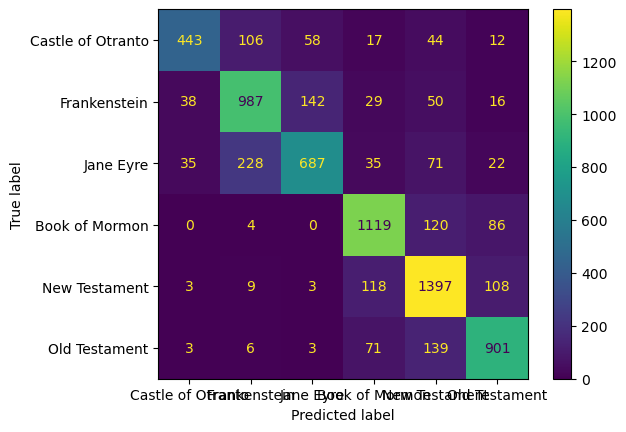

In [12]:
from sklearn.metrics import plot_confusion_matrix

predictions = vectorizer.transform(X_test)
plot_confusion_matrix(clf, predictions, y_test, labels=['Castle of Otranto', 'Frankenstein', 'Jane Eyre', 
                                                       'Book of Mormon', 'New Testament', 'Old Testament']) 
print("Accuracy:", accuracy_score(y_test, clf.predict(predictions)))

An item of significance, from these results, is the Book of Mormon is misclassified as the New or Old Testament much more than the control books. Also the majority of mislabels as the Book of Mormon were from the New or Old Testament. This shows that while the Book of Mormon's publishing was closer to the control books, the Naive Baye's classifier found it more similar to the Bible.

Let's see the scatterplot for this data from TSNE:

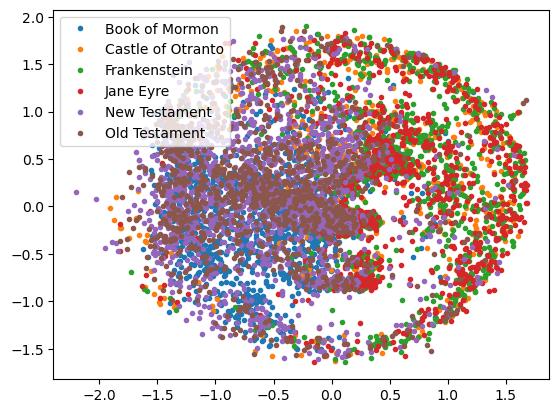

In [13]:
d = {'z1': X_tsne[:, 0], 'z2': X_tsne[:, 1], 'y': y_test}
df = pd.DataFrame(data=d)

groups = df.groupby('y')
for name, group in groups:
    plt.plot(group.z1, group.z2, marker='o', linestyle='', markersize=3, label=name)
    
plt.legend()

Looking at the above scatterplot (and digesting it for a second), we can find a decent division between the religious books and non-religious books. We cannot however find as clean a division from the Book of Mormon and the Bible books.
This is again shows the ability of machine learning to distinguish the Book of Mormon from control books, more than it can the Bible.

## Conclusions and Future Work

While the work in is this project hasn't proved a connection between the Book of Mormon and the Bible, it does give us interesting insights into their relation to each other. We discovered that Multinomial Naive Bayes classifier misclassified the Book of Mormon as the Bible more often than it did the control books. We also found that a TSNE scatterplot could provide a clearer division between the Book of Mormon and the control books than it could the Bible.

What we found does not prove similarity (since similarity is not well defined), but it does suggest it. If we define similarity as difficulty to discern between two objects, then we have found that the Book of Mormon is more similar to the Bible than it is to books of similar publishing date.

If we want to pursue misclassification as a means of measuring similarity, then the next steps we would be to find a means of measuring it. For the Book of Mormon example, we could measure how many times it was mislabled as another book divided by the number of Book of Mormon examples there are. Or we could measure how many times other books were mislabeled as the Book of Mormon (divided by their total number). This would give a way to compare the similarity of all the books.

To further investigate the similarity of the Book of Mormon to the Bible, it would probably be good to find many other books to compare with other than the 3 control books we selected.

## References

Religious Books: https://www.kaggle.com/datasets/crumblyminotaur/religious-text-scriptural-canon

Control Books: https://www.kaggle.com/datasets/charlesaverill/gothic-literature?select=castleofotranto.txt